Build a random forest classifier to predict the risk of heart disease based on a dataset of patient
information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type,
resting blood pressure, serum cholesterol, and maximum heart rate achieved.
Dataset link: https://drive.google.com/file/d/1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ/view?
usp=share_link

Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

In [2]:
import pandas as pd
data_url = "https://drive.google.com/uc?id=1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"
df = pd.read_csv(data_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [6]:
from sklearn.model_selection import train_test_split

# Split into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

#  training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Q3. Train a random forest classifier on the training set using 100 trees and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, random_state=42)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#  predictions on the test set
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.81
Precision: 0.84
Recall: 0.82
F1 Score: 0.83



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.


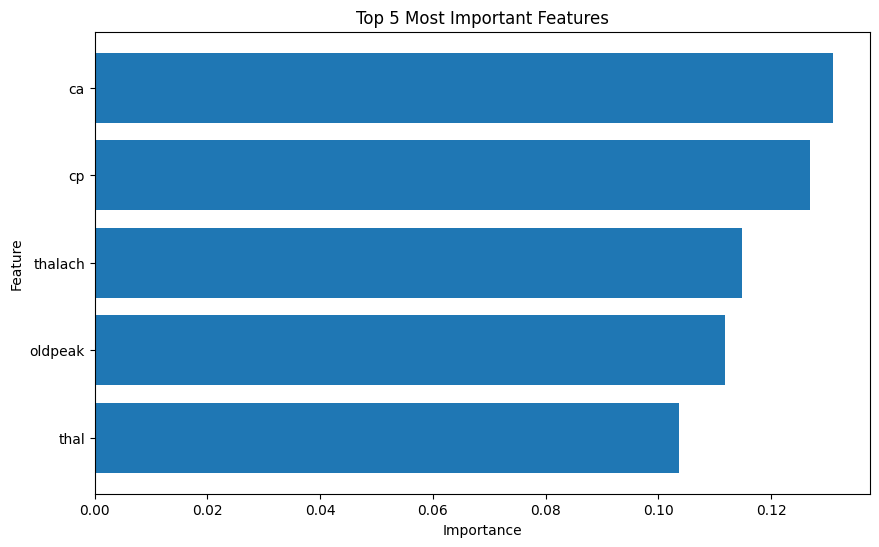

In [9]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
feature_importances = rf_classifier.feature_importances_

# DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

top_5_features = importance_df.head(5)

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Most Important Features')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important feature at the top
plt.show()


Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try
different values of the number of trees, maximum depth, minimum samples split, and minimum samples
leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [25]:
# Get best hyperparameters from the search
best_params = grid_search.best_params_

print(best_params)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.


In [13]:
from sklearn.metrics import classification_report

#  best classifier from grid search
best_rf_classifier = grid_search.best_estimator_

# Evaluate best classifier
y_pred_best = best_rf_classifier.predict(X_test)

# performance metrics
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

# best hyperparameters and performance metrics
print("Best Hyperparameters:", best_params)
print(f"Accuracy (Best Model): {accuracy_best:.2f}")
print(f"Precision (Best Model): {precision_best:.2f}")
print(f"Recall (Best Model): {recall_best:.2f}")
print(f"F1 Score (Best Model): {f1_best:.2f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy (Best Model): 0.84
Precision (Best Model): 0.84
Recall (Best Model): 0.86
F1 Score (Best Model): 0.85


Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


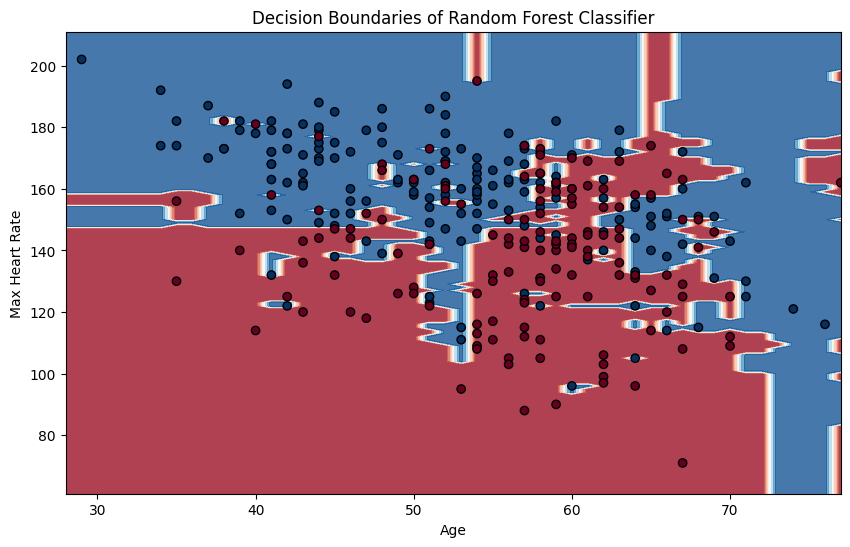

In [14]:
# Select 'age' and 'max heart rate achieved' for visualization
X_vis = X[['age', 'thalach']]

# Train Random Forest classifier on these two features (for visualization purposes)
rf_classifier_vis = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_classifier_vis.fit(X_vis, y)

# scatter plot of the two features with decision boundaries
import numpy as np
xx, yy = np.meshgrid(np.arange(X_vis['age'].min() - 1, X_vis['age'].max() + 1, 1),
                     np.arange(X_vis['thalach'].min() - 10, X_vis['thalach'].max() + 10, 1))
Z = rf_classifier_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X_vis['age'], X_vis['thalach'], c=y, cmap=plt.cm.RdBu, edgecolors='k')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.title('Decision Boundaries of Random Forest Classifier')
plt.show()


Interpretation:

The decision boundaries in this simplified example show how the Random Forest classifier separates the classes based on 'age' and 'max heart rate achieved.'
Limitations: This visualization is a simplification. In reality, Random Forest operates in a high-dimensional feature space, making it challenging to visualize decision boundaries comprehensively. The model's predictions depend on interactions among all features.

Insights: The model's decision boundaries can provide insights into how it combines features to make predictions. Understanding the feature importances (as in Q5) is often more informative.
 Interpreting Random Forest models can be complex, but analyzing feature importances, hyperparameter tuning, and visualization of decision boundaries can provide valuable insights into the model's behavior.